# 对数据集探索性分析

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [7]:
data=load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
data = load_breast_cancer()
x, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error  

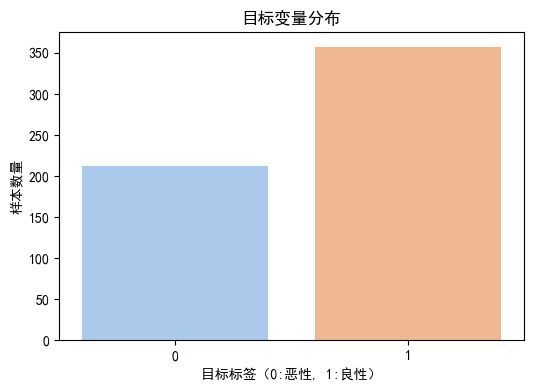

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 DataFrame 方便分析
df = pd.DataFrame(x, columns=feature_names)
df['target'] = y

# 数据基本信息
print("数据基本信息：")
print(df.info())

# 查看数据统计信息
print("\n数据描述性统计：")
print(df.describe())

# 查看分类标签的分布情况
print("\n目标变量分布：")
print(df['target'].value_counts())
print(f"目标标签对应含义：{target_names}")

# 可视化目标变量分布
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title("目标变量分布")
plt.xlabel("目标标签（0:恶性, 1:良性）")
plt.ylabel("样本数量")
plt.show()

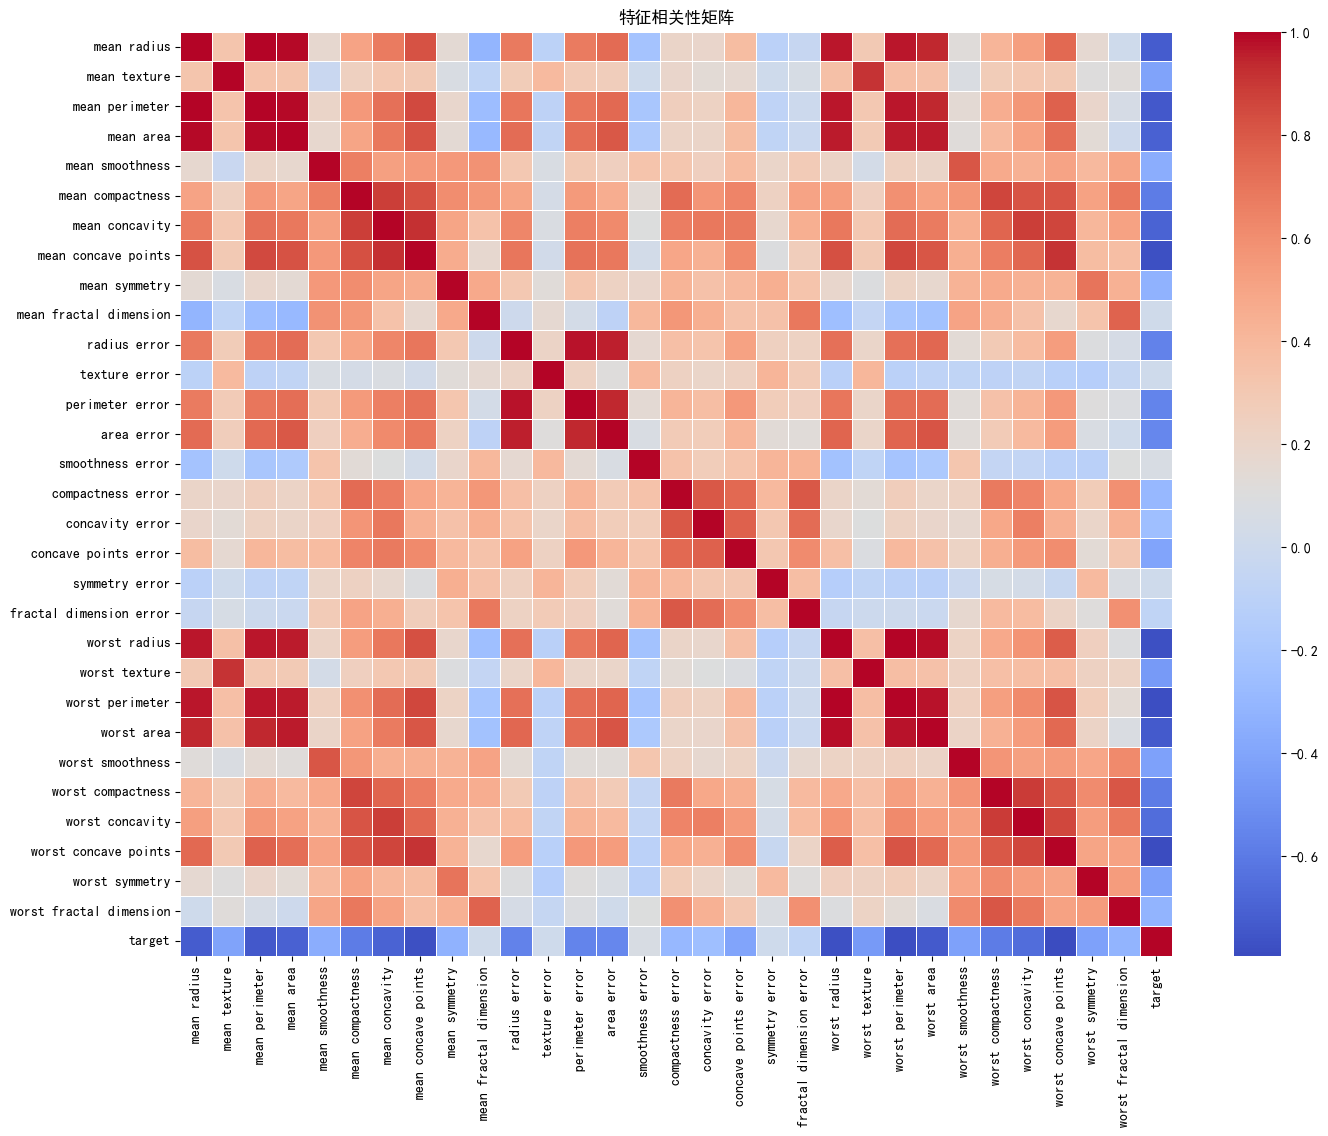

In [14]:
# 查看每个特征的相关性矩阵
correlation_matrix = df.corr()

# 热力图展示相关性
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("特征相关性矩阵")
plt.show()

In [19]:
correlation_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [24]:
# 查看特征与目标变量的相关性
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\n特征与目标变量的相关性：")
target_corr


特征与目标变量的相关性：


target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

# logistics回归模型

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score# 模型评估指标

In [26]:
x,y=load_breast_cancer(return_X_y=True)

In [28]:
x_train,x_test, y_train, y_test = train_test_split(
x,y,
train_size=0.875,test_size=0.125, random_state=188)
print(f"训练集样本数量: {len(x_train)}, 测试集样本数量: {len(x_test)}")

训练集样本数量: 497, 测试集样本数量: 72


In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
# 导入必要的库
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm # 用于显示进度条
import matplotlib.pyplot as plt

# 加载乳腺癌数据集
data = load_breast_cancer()
x, y = data.data, data.target

# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(
x, y, train_size=0.875, test_size=0.125, random_state=188
)


正在训练模型以选择最佳 max_iter...


训练进度:   0%|                                                                                 | 0/20 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
训练进度:  85%|█████████████████████████████████████████████████████████████▏          | 17/20 [00:00<00:00, 16.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

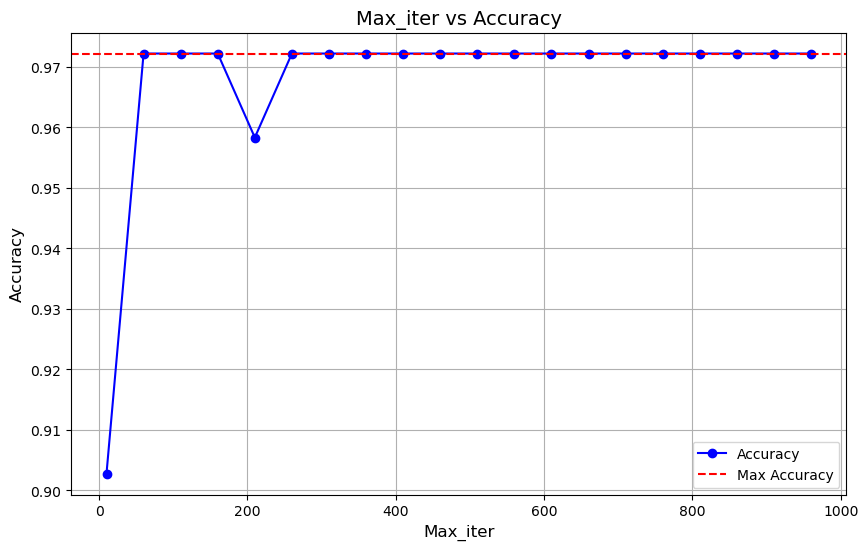


最佳 max_iter 值：60
对应的最高准确率：0.9722


In [7]:
# 定义 max_iter 范围
max_iter_values = range(10, 1010, 50) #每隔 50 取一个值
accuracies = [] # 用于存储每个 max_iter 的准确率

print("正在训练模型以选择最佳 max_iter...")
for max_iter in tqdm(max_iter_values, desc="训练进度"):
    model = LogisticRegression(max_iter=max_iter, random_state=200)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred)) # 记录准确率到矩阵

# 作图
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, accuracies, marker='o', color='b', label='Accuracy')
plt.axhline(max(accuracies), color='r', linestyle='--', label='Max Accuracy')
plt.title('Max_iter vs Accuracy', fontsize=14)
plt.xlabel('Max_iter', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# 找最佳
best_max_iter = max_iter_values[accuracies.index(max(accuracies))]
print(f"\n最佳 max_iter 值：{best_max_iter}")
print(f"对应的最高准确率：{max(accuracies):.4f}")


In [8]:
# 使用最佳 max_iter 值重新训练模型
print("\n使用最佳 max_iter 值训练模型...")
with tqdm(total=1, desc="训练进度") as pbar:
    final_model = LogisticRegression(max_iter=best_max_iter, random_state=188)
    final_model.fit(x_train, y_train)
    pbar.update(1) 

y_pred = final_model.predict(x_test)

# 模型评估
print("\n模型的分类报告：")
print(classification_report(y_test, y_pred))
final_accuracy = accuracy_score(y_test, y_pred)
print(f"模型的准确率：{final_accuracy:.4f}")


使用最佳 max_iter 值训练模型...


训练进度:   0%|                                                                                  | 0/1 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
训练进度: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 340.89it/s]


模型的分类报告：
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.98      0.98      0.98        45

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

模型的准确率：0.9722


In [41]:
from tqdm import tqdm # 显示训练进度条
# 创建逻辑回归模型
model = LogisticRegression(max_iter=10000, random_state=188, verbose=0)
print("开始训练逻辑回归模型...")
for i in tqdm(range(1, 1001), desc="训练进度"):
    if i == 1000: 
        model.fit(x_train, y_train)
print("模型训练完成！")

开始训练逻辑回归模型...


训练进度: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3371.34it/s]

模型训练完成！


In [43]:
# 进行预测
y_pred = model.predict(x_test)

print("分类报告：")
print(classification_report(y_test, y_pred))
# 输出预测的准确率
print("准确率：", accuracy_score(y_test, y_pred))

分类报告：
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.98      0.98      0.98        45

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

准确率： 0.9722222222222222
